# Lecture 15: Fault friction and the rate-state model
## GEO 371T/391: Earthquakes
### Prof. Daniel Trugman, 2021

In [1]:
### Import General Python Packages

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

# Overview

Earthquakes involve the relative motion between fault surfaces, with driving stresses meeting resistance of frictional forces. Thus, understanding fault friction is a key objective in earthquake science, and one that is still an active area of research today. In high school, many of you likely solved problems related to friction ("consider a box on an inclined plane"). If friction is the domain of elementary physics, then what is the big deal?

Fair question, but the answer is that in the real world of Earth science, friction is a much more complicated physical process than you may have been led to believe. Yes, there is still a distinction between "static" and "dynamic" friction as you may recall, but the precise evolution friction during fault slip is fully nonlinear process. This notebook will focus on the the "rate-and-state" model of friction (RSF) that has been widely used to describe laboratory earthquake experiements and the source processes of real earthquakes. While not without its limitations, RSF is the underpinnings of even the most advanced, state-of-the-art models of earthquake rupture dynamics. 

The examples we will consider today will be both conceptual and applied, including numerial solutions to RSF equations for simple scenarios. During homework, we will also consider more classical models of frictional failure in fault processes (Mohr-Coulomb) and think critically about the idea of fault strength.

## Example 1: Rate-and-state Friction: A Conceptual Overview

In high school physics, you may have learned that the value of static friction, when an object is stationary, is larger than the dynamic value, when an object is moving. The transition from static to dynamic friction is an example of a weakening process, which is a prerequisite for the type of unstable fault slip that is the hallmark of earthquakes. However, both laboratory experiments and field observations indicate a more complicated picture, that fault friction is both highly sensitive to the rate of fault slip and to the "state" of the system, in particular the timing and evolution of frictional contacts between the two surfaces.

With this in mind, the widely-used rate-and-state friction law can be written in the form:

\begin{equation}
\mu = \mu_0 + a \log \left(\frac{v}{v_0}\right) + b \log \left(\frac{\theta}{\theta_0} \right),
\end{equation}

where $\mu$ is the coefficient of friction (in an unfortunate coincidence, $\mu$ is also often used to denote a shear modulus...), $v$ is the slip rate, and $\theta$ is a state variable that evolves with time and slip. Here, $a$ and $b$ are constituitive parameters (positive numbers), and $\mu_0$ is the steady-state friction at reference velocity $v_0$ and state $\theta_0$. Quite often, $\theta_0$ is written as $\theta_0 = D_c/v_0$, and we have:

\begin{equation}
\mu = \mu_0 + a \log \left(\frac{v}{v_0}\right) + b \log \left(\frac{v_0 \theta }{D_c} \right),
\end{equation}

where $D_c$ is a characteristic distance over which the frictional state evolves.

Note: in the equations above and below, $\log() = \ln()$, not $\log_{10}()$.

---

The evolution of slip velocity $v$ is governed by the equations of motion, with the driving shear stress resisted by a frictional stress $\mu \sigma$. But we also need to know how the state variable $\theta$ evolves with time. The state variable $\theta$ has units of time, and can be conceptualized as a measure of the effective age of contacts in the system. The "older" these contacts are, the larger the value of $\theta$ and thus the larger the friction $\mu$.

Two end-member state evolution equations have been proposed.

The Dieterich, "aging" law is:
\begin{equation}
\frac{d \theta}{dt} = 1 - \frac{v \theta}{D_c},
\end{equation}

while the Ruina, "slip" law is:
\begin{equation}
\frac{d \theta}{dt} = -\frac{v \theta}{D_c} \log \left(-\frac{v \theta}{D_c} \right).
\end{equation}

The differences between these two state-evolution laws is subtle, and thus there is no general consensus on which is more "correct" (both are undoubtedly simplifications). Recent experimental evidence may favor the "slip" law (e.g. Marone and Saffer, 2015), but only time will tell.

---

Since $a$ and $b$ are both positive, friction $\mu$ increases with increasing slip velocity $v$ and with increasing state $\theta$. The former is conceptually similar to the idea of frictional "drag", while the latter reflects a sort of fault healing and restrengthening process. In RSF, the velocity-dependence is governed by the parameter $a$, while the state-dependence is governed by the parameter $b$. These two processes sort of trade off with one another, as the fault zone doesn't heal when sliding fast, and the healing makes it harder to slip in the first place.


---

We can gain some insight into RSF by conducting a "velocity-stepping test" whereby we impose a step change in velocity from an initial value $v_1$ to a final value of $v_2$ at a time $t_2$.

If the system is in steady state before the jump, then $\frac{d \theta}{dt} = 0$ and $\theta_1 = D_c/v_1$.

The initial friction is then:

\begin{equation}
\mu_1 = \mu_0 + a \left(\frac{v_1}{v_0}\right) + b \log \left(\frac{v_0}{v_1} \right) = \mu_0 + (a-b) \log \left(\frac{v_1}{v_0}\right)
\end{equation}

Immediately after the velocity-step (without allowing any time for $\theta$ to evolve), friction $\mu$ jumps from $\mu_1$ to:

\begin{equation}
\mu = \mu_1 + a \log \left(\frac{v_2}{v_1}\right)
\end{equation}

Over time, $\theta$ evolves (assuming the aging law for simplicity) as:

\begin{equation}
\frac{d \theta}{dt} = 1 - \frac{v_2 \theta}{D_c},
\end{equation}

Integrating:

\begin{equation}
\int_{D_c/v_1}^{\theta} \frac{d \theta'}{1 - \frac{v_2 \theta'}{D_c}} = \int_{t_2}^t dt',
\end{equation}

we obtain:

\begin{equation}
\theta(t) = \frac{D_c}{v_2} + \left(\frac{D_c}{v_1}-\frac{D_c}{v_2} \right) \exp \left(- \frac{v_2(t-t_2)}{D_c} \right).
\end{equation}

---

Friction $\mu$ thus evolves from time $t_2$ as:

\begin{equation}
\mu = \mu_1 + a \log \left(\frac{v_2}{v_1}\right) + b \log \left(\frac{v_0 \theta(t)}{D_c}\right),  
\end{equation}

which after a fair amount of algebra looks like:

\begin{equation}
\mu = \mu_1 + a \log \left(\frac{v_2}{v_1}\right) + b \log \left[\frac{v_1}{v_2} + \left(1 -  \frac{v_1}{v_2}\right)\exp \left(-\frac{v_2}{D_c}(t-t_2) \right) \right]
\end{equation}

The physical interpretation is as follows. At $t=t_2$, $\mu$ jumps to a value of:

\begin{equation}
\mu = \mu_1 + a \log \left(\frac{v_2}{v_1}\right)
\end{equation}

Rather than staying constant, $\mu$ evolves to a new value of $\mu_2$ over a chacteristic distance $D_c$ and time $v_2/D_c$.

The final steady-state value is obtained as $t \rightarrow \infty$:
\begin{equation}
\mu_2 = \mu_1 + (a-b)\log\left(\frac{v_2}{v_1}\right).
\end{equation}

Let's plot this to take a look at what happens:

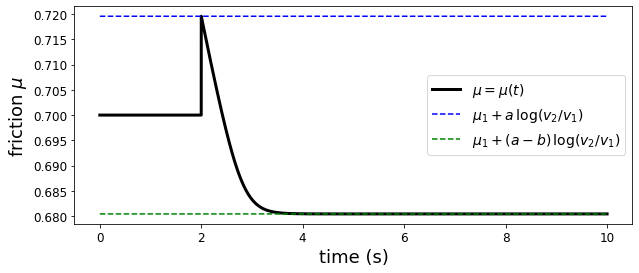

In [2]:
### Plot velocity step

# a, b, Dc
a = 0.005
b = 0.01
Dc = 10.0 # micrometer

# velocity
v1 = 1.0 # micrometer/s
v2 = 50.0 # micrometer/s

# friction
mu1 = 0.70

# time points
tt = np.linspace(0,10,10001)
t2 = 2.0

# compute friction
mu = mu1 + np.zeros_like(tt)
itt = tt>=t2
mu[itt] = mu1 + a*np.log(v2/v1) + b*np.log(
    v1/v2 + (1.0-v1/v2)*np.exp(-(v2/Dc)*(tt[itt]-t2)))

# figure setup
fig, axi = plt.subplots(1,1,figsize=(10,4))
axi.tick_params(labelsize=12)

# plot data
axi.plot(tt,mu,"-k",lw=3,label="$\mu = \mu(t)$")

# asymptotics
axi.plot(tt,0*tt+mu1+a*np.log(v2/v1),'--b',label="$\mu_1 + a \, \log(v_2/v_1)$")
axi.plot(tt,0*tt+mu1+(a-b)*np.log(v2/v1),'--g',label="$\mu_1 + (a-b) \, \log(v_2/v_1)$")

# formatting
axi.set_xlabel("time (s)",fontsize=18)
axi.set_ylabel("friction $\mu$",fontsize=18)
axi.legend(loc="center right",fontsize=14)

plt.show()
plt.close()

---

Note that the $x$ axis above is for time $t$, but could easily be converted to slip $s$ because at constant velocity $s = v_2/t$.

The above was for $b-a>0$. We can also try $b-a<0$:

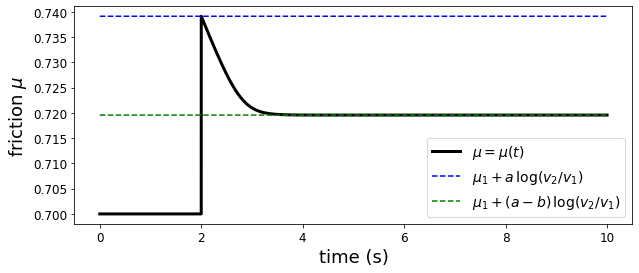

In [3]:
### Plot velocity step

# a, b, Dc
a = 0.01
b = 0.005
Dc = 10.0 # micrometer

# velocity
v1 = 1.0 # micrometer/s
v2 = 50.0 # micrometer/s

# friction
mu1 = 0.70

# time points
tt = np.linspace(0,10,10001)
t2 = 2.0

# compute friction
mu = mu1 + np.zeros_like(tt)
itt = tt>=t2
mu[itt] = mu1 + a*np.log(v2/v1) + b*np.log(
    v1/v2 + (1-v1/v2)*np.exp(-(v2/Dc)*(tt[itt]-t2)))

# figure setup
fig, axi = plt.subplots(1,1,figsize=(10,4))
axi.tick_params(labelsize=12)

# plot data
axi.plot(tt,mu,"-k",lw=3,label="$\mu = \mu(t)$")

# asymptotics
axi.plot(tt,0*tt+mu1+a*np.log(v2/v1),'--b',label="$\mu_1 + a \, \log(v_2/v_1)$")
axi.plot(tt,0*tt+mu1+(a-b)*np.log(v2/v1),'--g',label="$\mu_1 + (a-b) \, \log(v_2/v_1)$")

# formatting
axi.set_xlabel("time (s)",fontsize=18)
axi.set_ylabel("friction $\mu$",fontsize=18)
axi.legend(loc="lower right",fontsize=14)

plt.show()
plt.close()

---

Or a velocity drop instead of a velocity spike (here, $b-a > 0$):

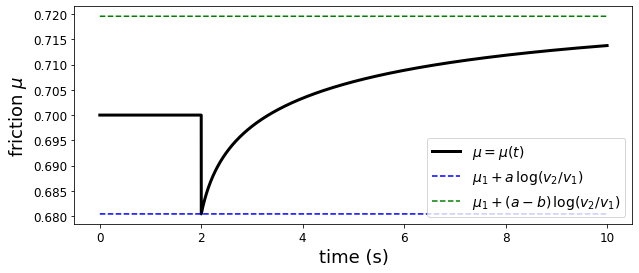

In [4]:
### Plot velocity step

# a, b, Dc
a = 0.005
b = 0.01
Dc = 10.0 # micrometer

# velocity
v1 = 50.0 # micrometer/s
v2 = 1.0 # micrometer/s

# friction
mu1 = 0.70

# time points
tt = np.linspace(0,10,10001)
t2 = 2.0

# compute friction
mu = mu1 + np.zeros_like(tt)
itt = tt>=t2
mu[itt] = mu1 + a*np.log(v2/v1) + b*np.log(
    v1/v2 + (1-v1/v2)*np.exp(-(v2/Dc)*(tt[itt]-t2)))

# figure setup
fig, axi = plt.subplots(1,1,figsize=(10,4))
axi.tick_params(labelsize=12)

# plot data
axi.plot(tt,mu,"-k",lw=3,label="$\mu = \mu(t)$")

# asymptotics
axi.plot(tt,0*tt+mu1+a*np.log(v2/v1),'--b',label="$\mu_1 + a \, \log(v_2/v_1)$")
axi.plot(tt,0*tt+mu1+(a-b)*np.log(v2/v1),'--g',label="$\mu_1 + (a-b) \, \log(v_2/v_1)$")

# formatting
axi.set_xlabel("time (s)",fontsize=18)
axi.set_ylabel("friction $\mu$",fontsize=18)
axi.legend(loc="lower right",fontsize=14)

plt.show()
plt.close()

---

In this case, the system takes a longer time to evolve because slip rate $v_2$ is lower and needs to slip of order $D_c$.

## Example 2: Solving the RSF Equations using the ``rsfmodel`` package

Of course, analytical solutions only can get us so far. For real-world problems we will need to resort to numerical methods to solve rate-and-state friction problems. For many years, research teams at different universities would all write their own numerical codes from scratch. This has a few disadvantages, especially in terms of proper benchmarking and testing of codes, and transfer of research between teams. Not too mention, a lot of time was wasted reinventing the wheel.

Recently, a team at Penn State (Leeman et al., 2016) developed the open source ``rsfmodel`` software package for solving RSF problems using Python. This is a superb research and teaching tool, especially for our purposes today. The code is publicly available here: https://github.com/jrleeman/rsfmodel, though is not as well documented as I would like. Not to worry, I'll walk you through some examples.

**Installation note**: for the code below to run properly, you will need to download the rsfmodel/ folder from Canvas and place it in the same directory as your notebook. That way, when you call ``from rsfmodel import ...``, python treats it like any other module. [This is actually a useful way of organizing software packages you develop. For example, in my research I have made software packages for ray tracing (generating travel time tables for earthquake location) and for statistical seismology.]

Alternatively (or for long-term use), follow the installation instructions here: https://github.com/jrleeman/rsfmodel/blob/master/docs/source/installationguide.rst.

---

A useful conceptual framework for studying fault friction, whether in the lab or in the field, is to model the slip of a block-slider, pulled by a spring. Leeman et al. (2016) have a nice conceptual picture of this:

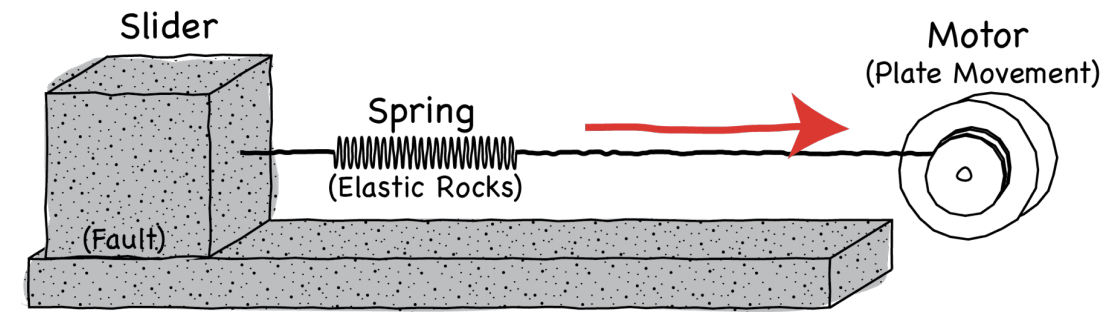

---

Here, a block is pulled by a spring of a given stiffness and at a given loading velocity. This is analagous to the tectonic loading rate in natural fault systems, or the driving velocity in the lab. 

The loading, in turn, is resisted by frictional forces. In this case, we assume a generic form rate-and-state friction, and can customize things like the constituitive parameters $a$ and $b$ and state-evolution equation.

---

Let's take a look at some simple examples using ``rsfmodel``. The first step is just to import packages and initialize a model.

In [8]:
### Setup for rsfmodel

# imports
from rsfmodel import rsf, staterelations, plot # imports

# define a new, blank model
model = rsf.Model()

---

Next, we set the model's initial conditions:

In [9]:
### Set model initial conditions

model.mu0 = 0.6 # Reference friction (i.e., at the reference velocity)
model.a = 0.005 # Empirical coefficient for the direct effect
model.k = 1e-1 # Normalized System stiffness (friction/micron)
model.v = 1. # Initial slider velocity, generally is vlp(t=0)
model.vref = 1. # Reference velocity, generally vlp(t=0)

---

We need to set up our state-evolution equation. ``rsfmodel`` gives a lot of flexiblity here, but we'll do the sip Dieterich (slip) law for our example:





In [10]:
### Set up state relation

# use Dieterich law
state1 = staterelations.DieterichState()

# set coefficients
state1.b = 0.01  # Empirical coefficient for the evolution effect
state1.Dc = 10.  # Critical slip distance

# link to our model
model.state_relations = [state1] # Which state relation we want to use

---

Last, we need to set "experimental" conditions like the runtime and the loading point velocity. Consider a simple velocity stepping test:


In [11]:
### Set up experimental conditions

# We want to solve for 40 seconds at 100Hz
model.time = np.arange(0,40.01,0.01)

# We want to slide at 1 um/s for 10 s, then at 10 um/s for 31
lp_velocity = np.ones_like(model.time)
lp_velocity[10*100:] = 10. # Velocity after 10 seconds is 10 um/s

# Set the model load point velocity, must be same shape as model.model_time
model.loadpoint_velocity = lp_velocity

---

That's all we need to do! Running the model is as easy as:

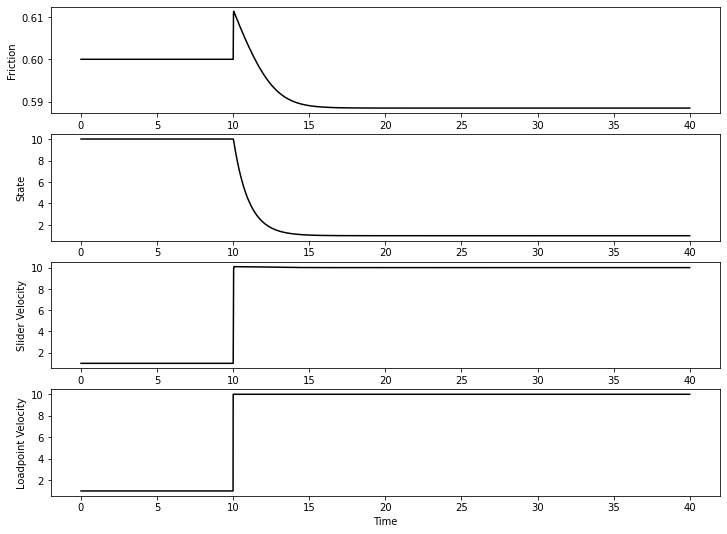

In [12]:
### Run model, plot results

# Run the model!
model.solve()

# Make a plot in time
plot.timePlot(model)
plt.close()

---

We can also easily plot as a function of displacement.

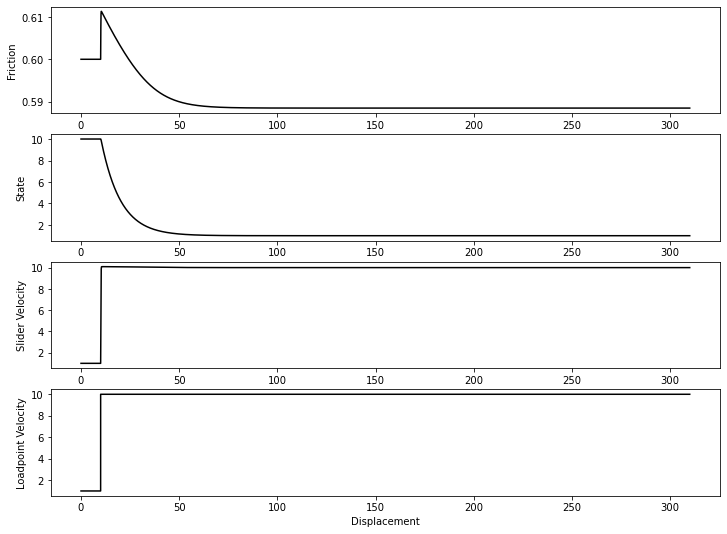

In [13]:
### Make a plot in displacement

plot.dispPlot(model)
plt.show()

---

Of course, it is very easy to change the conditions. What if we add more velocity jumps?

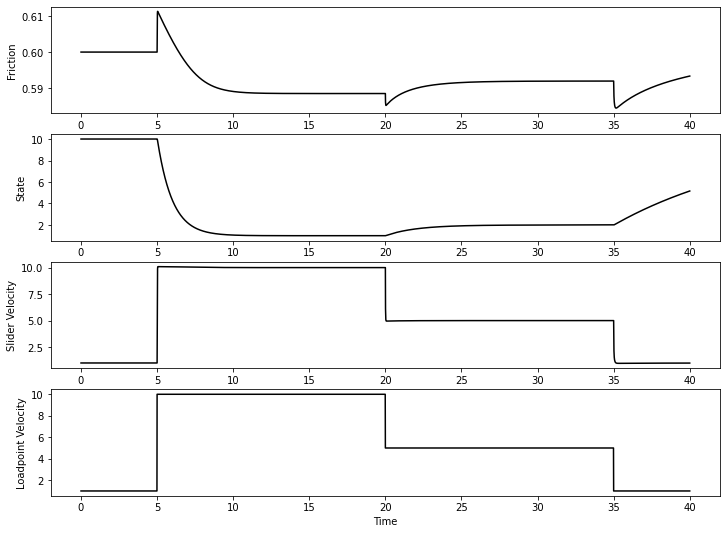

In [14]:
### Slide-hold-slide test

# We want to solve for 40 seconds at 100Hz
model.time = np.arange(0,40.01,0.01)

# Similar to before, but multiple jumps
lp_velocity = np.ones_like(model.time)
lp_velocity[5*100:] = 10. # Velocity after 5 seconds is 10 um/s
lp_velocity[20*100:] = 5. # Velocity after 20 seconds is 5 um/s
lp_velocity[35*100:] = 1. # Velocity after 35 seconds is 1 um/s

# Set the model load point velocity, must be same shape as model.model_time
model.loadpoint_velocity = lp_velocity

# Run the model!
model.solve()

# Make a plot in time
plot.timePlot(model)
plt.close()

This example only gives a basic feel for how this very powerful code works. We will take a closer look during homework, but event then only begin to scratch the surface.

# HOMEWORK

## Problem 1: Mohr-Coulomb Failure and Fault Strength

**Question 1(a)**

In the Mohr-Coulomb theory of faulting, fracture is expected to occur on optimally-oriented planes in in-tact, homogenous rock. The angle $\phi_{opt}$ from the principal stress $S_1$ can be related to the friction coefficient $\mu$ by:

\begin{equation}
\tan (2\phi_{opt}) = 1/\mu
\end{equation}

Plot friction $\phi_{opt}$ in degrees on the y-axis versus $\mu$ on the x-axis for values of $\mu$ ranging from 0.05 to 1.2. 

For weaker faults (lower $\mu$), is $\phi$ closer to or further away from $S_1$?

<font color='blue'>

**ANSWER**
 
The weaker the fault is (lower $\mu$) the further away $\phi_{opt}$ is from $S_1$. This makes sense because in the case of a weak fault, we don't need a strong driving stress to initiate slip. In contrast, we do need high stress for a strong fault.
    
</font>

In [ ]:
### Optimally Oriented Planes ###

# figure setup
fig, axi = plt.subplots(figsize=(8,5))

# phi vs mu
mu = np.linspace(0.05,1.2,201)
#phi = np.arctan2(np.ones(mu.size),mu)/ 2.0 # (y,x) syntax
phi = np.arctan(1.0/mu) / 2.0 # gives the same answer, which is good!
phiD = 180.0/np.pi * phi # in degrees

# plot results
axi.plot(mu,phiD,"-k")

# formatting
axi.set_xlabel("$\mu$", fontsize=16)
axi.set_ylabel("$\phi_{opt}$ ($\degree$)",fontsize=16)
axi.tick_params(labelsize=12)
axi.grid(lw=0.02)

# show plot
plt.show()
plt.close()

**Question 1(b)**

In reality, faulting may not occur on optimally oriented faults. However, there is a maximum value of $\phi$ beyond which faulting should not occur for any combination of positive stresses.

This angle is known as the "lock-up" angle. From Mohr's Circle analysis with differential stress $S_1 - S_3$, we have:

\begin{equation}
\frac{S_1}{S_3} = \frac{1 + \mu \cot \phi}{1 - \mu \tan \phi}
\end{equation}

The lock-up angle $\phi_{lu}$ is the maximum value of $\phi$ satisfying this equation, which is:

\begin{equation}
\phi_{lu} = \tan^{-1}(1/\mu).
\end{equation}

Thus, if we go out in the field and measure $\phi$, we can place an upper bound on the friction coefficient:

\begin{equation}
\mu \leq 1 /\tan \phi
\end{equation}

With this in mind plot the the maximum values of $\mu$ on the y-axis versus $\phi$ on the x-axis for values of $\phi$ from 10 to 90 degrees. What do you notice?


<font color='blue'>

**ANSWER**
 
The larger the values of $\phi$ we measure, the tighter our upper bound is on $\mu$. That is, if we measure high values of $\phi$ in the field, this implies the faults in question are weak. Note that as $\phi \rightarrow 0$, our upper bound on $\mu$ grows without bound, providing very little information on this front.
    
</font>

In [ ]:
### Lock Up Angle

# figure setup
fig, axi = plt.subplots(figsize=(8,5))

# phi vs mu
phiD = np.linspace(10.0,90.0,201)
phi = phiD *  np.pi / 180.0
mu = 1.0/np.tan(phi)

# plot results
axi.plot(phiD,mu,"-k")

# formatting
axi.set_ylabel("$\mu$", fontsize=16)
axi.set_xlabel("$\phi_{lu}$ ($\degree$)",fontsize=16)
axi.tick_params(labelsize=12)
axi.grid(lw=0.02)

# show plot
plt.show()
plt.close()

**Question 1(c)**

What values of $\phi$ might one might expect for a "strong" fault that obey's Byerlee's law, with $\mu \sim~ 0.6-0.8$?

Along the San Andreas and other mature strike-slip faults, authors have reported faulting angles nearly perpendicular to $S_1$ (Zoback et al., 1987, Ikeda 2001, Provost and Houston, 2003). What value of $\mu$ is implied by these measurements of $\phi \approx  75 - 85$ degrees? Why might these faults be "weak"?

<font color='blue'>

**ANSWER**
 
For $\mu$ = 0.6, we have $\phi_{lu}$ = 59.0, while for $\mu$ = 0.8, we have $\phi_{lu}$ = 51.3.

In contrast, $\phi_{lu}$ values of 75 and 85 degrees imply upper bounds on $\mu$ of 0.27 and 0.09. 

This implies that the faults in question are weak because these friction parameters are much lower than implied by Byerlee's law.
    
</font>

In [ ]:
### Calculate Friction Values for the Above ###

# Byerlee
mu = 0.6
phi = np.arctan(1/mu)
phiD = 180.0 / np.pi * phi
print("For \mu = %.2f, \phi_{lu} = %.1f" %(mu,phiD))
mu = 0.8
phi = np.arctan(1/mu)
phiD = 180.0 / np.pi * phi
print("For \mu = %.2f, \phi_{lu} = %.1f" %(mu,phiD))

# Weak faults
phiD = 75.0
phi = np.pi / 180.0 * phiD
mu = 1/np.tan(phi)
print("For \phi_{lu} = %.1f, \mu = %.2f" %(phiD,mu))
phiD = 85.0
phi = np.pi / 180.0 * phiD
mu = 1/np.tan(phi)
print("For \phi_{lu} = %.1f, \mu = %.2f" %(phiD,mu))


## Problem 2: RSF Concepts: Steady-state friction

**Question 2(a)**

Consider the classic rate-and-state friction equation:

\begin{equation}
\mu = \mu_0 + a \log \left(\frac{v}{v_0}\right) + b \log \left(\frac{v_0 \theta }{D_c} \right).
\end{equation}

At steady state, $v=v_{ss}$ is constant and $\theta = D_c / v_{ss}$ is as well.

Plugging these values in, derive a formula for the steady-state value of friction $\mu_{ss}$. Simplify this as much as you can.

<font color='blue'>

**ANSWER**
 
Substituting, we have:
    
\begin{equation}
\mu_{ss} = \mu_0 + a \log \left(\frac{v_{ss}}{v_0}\right) + b \log \left(\frac{v_0 D_c }{D_c v_{ss}} \right).
\end{equation}

Simplifying, we have:
    
\begin{equation}
\mu_{ss} = \mu_0 + (a - b) \log \left(\frac{v_{ss}}{v_0}\right).
\end{equation}    
    
</font>

**Question 2(b)**

There are two end-member frictional regimes. For the system to be "velocity-strengthening", $\mu$ must increase with $v$ from steady state, while for the system to be "velocity-weakening", $\mu$ must decrease with $v$ from steady state.

Using the expression you derived above as a guide, show mathematically which values of $a$ and $b$ is the system velocity-strengthening versus velocity weakening? 

<font color='blue'>

**ANSWER**
 
The trick here is to consider derivative $\frac{\partial \mu_{ss}}{\partial \log(v_{ss})}$, which measures how friction responds to increasing velocity (measured in log units).
    
Because $\mu_0$ and $v_0$ are constants, we simply have:

\begin{equation}    
\frac{\partial \mu_{ss}}{\partial \log(v_{ss})} = a - b
\end{equation}   
  
By definition, velocity-strengthening implies $\frac{\partial \mu_{ss}}{\partial \log(v_{ss})} > 0$ and hence $(a - b) > 0$. 
    
In contrast, velocity-weakening implies $\frac{\partial \mu_{ss}}{\partial \log(v_{ss})} < 0$ and hence $(a - b) < 0$.
                                                                                                                    
Thus the rate and state parameters $a$ and $b$ play an important role in controlling the frictional dynamics of the system.                                                                                          
    
</font>

**Question 2(c)**

The condition you derived above is necessary, though not completely sufficient for unstable, velocity-weakening behavior (as in earthquakes). One must also take the stiffness of the system into account.

Using a linear stability analysis, one may show that there is a critical stiffness
\begin{equation}
K_c = \frac{\sigma_n (b-a)}{D_c},
\end{equation}

that is also important to this problem ($\sigma_n$ is the effective normal stress). 

For unstable slip (e.g., stick-slip motion), must the system stiffness $K$ be greater or less than $K_c$? Why?

Keeping in mind that the normal stress $\sigma_n$, $(b-a)$, and even $D_c$ are all depth-dependent, what does this imply for fault slip in the Earth?

<font color='blue'>

**ANSWER**

If the system is too stiff, the block can't stick, and thus all motion is stable. Thus we must have $K < K_c$ for unstable slip (nucleation of earthquakes).
    
Since $\sigma_n$, $(b-a)$, and even $D_c$ are depth-dependent and fault zone dependent, we should anticipate variations in slip mode with depth and across fault systems.
    
</font>

## Problem 3: Fun with rsfmodel codes

**Question 3(a)**

In the ``rsfmodel`` example above, we used a relatively stiff spring. Try replicating the example with a reduced spring stiffness. What happens and why? In a real Earth fault system, what is the natural analog of the block-slider spring?

<font color='blue'>

**ANSWER**
 
For a stiff spring, the loading (e.g tectonic plate) efficiently transmits stresses and the block transitions sharply. Less stiff springs provide smoother transition and less stringent constraints.
    
See the cells below for a comparison.
    
</font>

In [ ]:
### Initial model setup ###

# imports
from rsfmodel import rsf, staterelations, plot # imports

# define a new, blank model
model = rsf.Model()

### Set model initial conditions
model.mu0 = 0.6 # Reference friction (at the reference velocity)
model.a = 0.005 # Empirical coefficient for the direct effect
model.k = 1e-1 # Normalized System stiffness (friction/micron)
model.v = 1. # Initial slider velocity, generally is vlp(t=0)
model.vref = 1. # Reference velocity, generally vlp(t=0)

### Set up state relation

# use Dieterich law
state1 = staterelations.DieterichState()

# set coefficients
state1.b = 0.01  # Empirical coefficient for the evolution effect
state1.Dc = 10.  # Critical slip distance

# link to our model
model.state_relations = [state1] # Which state relation we want to use

### Slide-hold-slide test

# We want to solve for 40 seconds at 100Hz
model.time = np.arange(0,40.01,0.01)

# Similar to before, but multiple jumps
lp_velocity = np.ones_like(model.time)
lp_velocity[5*100:] = 10. # Velocity after 5 seconds is 10 um/s
lp_velocity[20*100:] = 5. # Velocity after 20 seconds is 5 um/s
lp_velocity[35*100:] = 1. # Velocity after 35 seconds is 1 um/s

# Set the model load point velocity, must be same shape as model.model_time
model.loadpoint_velocity = lp_velocity

In [ ]:
### Strong spring
model.k = 1e-1 # Normalized System stiffness (friction/micron)

# Run the model!
model.solve()

# Make a plot in time
plot.timePlot(model)
plt.close()

In [ ]:
#### Now weaken spring
model.k = 5e-3 # Normalized System stiffness (friction/micron)

# Run the model!
model.solve()

# Make a plot in time
plot.timePlot(model)
plt.close()

**Question 3(b)**

One of the great things about ``rsfmodel`` is that it supports many different state-evolution equations (and even allows users to define their own!)

In the example above, we used the Dieterich law, `staterelations.DieterichState()`:
\begin{equation}
\frac{d \theta}{dt} = 1 - \frac{v \theta}{D_c},
\end{equation}

In lecture, we learned about the Ruina law, `staterelations.RuinaState()`:
\begin{equation}
\frac{d \theta}{dt} = -\frac{v \theta}{D_c} \log \left(-\frac{v \theta}{D_c} \right).
\end{equation}

There is also the PRZ law, `staterelations.PrzState()`:
\begin{equation}
\frac{d \theta}{dt} = 1 - \left(\frac{v \theta}{2D_c} \right)^2
\end{equation}

You can even define your own; see https://github.com/jrleeman/rsfmodel/blob/master/examples/defining_new_state_relation.py for how this works.

Try out some of these other state evolution laws, and compare them to the Dieterich example. Do you notice any differences? 

<font color='blue'>

**ANSWER**
 
The code below compares the three above station relations with fixed $a, b, D_c$. The Dieterich state relation has the gentlest friction transitions in response to a loading change, while PRZ is most abrupt. The overall functional forms are pretty similar overall. Thus it can be difficult to separate the validity of the state evolution laws with real data (where $a, b, D_c$ are unknown a-priori and must be inferred from data unde an assumed law...). 
    
</font>

In [ ]:
### Compare state relations ###

# reset spring stiffness
model.k = 1e-1 # Normalized System stiffness (friction/micron)

# Set up state relation
state1 = staterelations.DieterichState()
state2 = staterelations.RuinaState()
state3 = staterelations.PrzState()

# loop over states
for state in [state1, state2, state3]:
    
    # set state parameters
    state.b = 0.01  # Empirical coefficient for the evolution effect
    state.Dc = 10.  # Critical slip distance
    
    # link to our model
    model.state_relations = [state]
    print("Working on",state)
    
    # Run the model!
    model.solve()

    # Make a plot in time
    fig, plot.timePlot(model)
    plt.close()
    